# Setup and Libraries

In [1]:
import Stock
import torch
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
import time
import pandas as pd
from Plots import *
from pytorch_lightning.callbacks import Callback
import warnings; warnings.filterwarnings("ignore")


# Data Collection and Preprocessing 

## Acquiring Google Stock Price Data from Yahoo Finance

To obtain historical stock data for Google, we accessed the Yahoo Finance website. The process involved the following steps:

1. **Visit Yahoo Finance:** Navigate to [finance.yahoo.com](https://finance.yahoo.com/).

2. **Search for Google Stock:** Use the search bar to find information about Google's stock by entering either "Google" or the stock ticker symbol (GOOGL or GOOG).

3. **Access Historical Data:** Once on the Google stock page, locate the "Historical Data" or "Price History" section.

4. **Select Date Range:** Specify the desired date range for the historical stock data.

5. **Choose Frequency and Format:** Select the frequency (daily, weekly, monthly) and preferred format for downloading or viewing the data.

6. **Download Data:** Use the provided option (e.g., "Download" or "Export") to save the historical stock data file, often in CSV or Excel format.

### Why Yahoo Finance is Reliable:

Yahoo Finance is considered a reliable source for historical stock data for several reasons:

- **Long-standing Reputation:** Yahoo Finance has been a trusted financial platform for many years, providing accurate and comprehensive financial data.

- **Data Accuracy:** The platform aggregates data from reputable sources, ensuring the accuracy of historical stock prices.

- **User Accessibility:** Yahoo Finance is widely used by investors and financial professionals, attesting to its reliability and popularity in the financial community.

It's essential to stay updated with the latest data and comply with the terms of use outlined by Yahoo Finance.


## Explanation of Data Reading and Preprocessing Function

The provided Python function, `read_data`, serves the purpose of reading historical stock data from CSV files and preprocessing it for further analysis. Here's a breakdown of its key components:

### Data Scaling Options:

The function employs a set of scaling methods, stored in the `__scalers` dictionary:

- **MinMax:** Scales the data to a specified range (default: 0 to 1).
- **RobustScaler:** Uses robust statistics to scale the data, making it less sensitive to outliers.
- **MaxAbs:** Scales each feature by its maximum absolute value.
- **Standard:** Standardizes features by removing the mean and scaling to unit variance.
- **Normalizer:** Scales each data point to have a Euclidean norm of 1.

### Preprocessing Steps:

1. **Column Removal:**
   - The 'Adj Close' and 'Date' columns are removed from the dataset as they may not be necessary for certain analyses.

2. **Scaling (Optional):**
   - If the `scaling_method` parameter is specified (default is 'MinMax'), the data undergoes scaling using the chosen method from the `__scalers` dictionary. This step is optional and can be disabled by setting `scaling_method` to `None`.

3. **Reading Data:**
   - The function reads training and test datasets from CSV files specified by `__train_filepath` and `__test_filepath`.

4. **Preprocessing (Optional):**
   - If `preprocessing` is set to `True`, the function applies the preprocessing steps, including column removal and scaling, to both the training and test datasets.

### Function Output:

The function returns the preprocessed training and test datasets.

### Example Usage:

```python
# Example: Read and preprocess data using MinMax scaling
train_data, test_data = read_data(preprocessing=True, scaling_method='MinMax')


In [2]:
train_data, test_data = Stock.read_data(preprocessing=True, scaling_method='MinMax')

# Creating time frames For Stock Market Data


In [3]:
x_train, y_train = Stock.construct_time_frames(train_data, frame_size=64)
x_test, y_test = Stock.construct_time_frames(test_data, frame_size=64)

In [4]:
print("Shape of X Train",x_train.shape)
print("Shape of Y Train",y_train.shape)

Shape of X Train (438, 64, 5)
Shape of Y Train (438, 1)


# Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
stock_data = pd.read_csv(r".\Google_Stocks_Train.csv")


### Pairplot of Numerical Features

**Explanation:**

The pairplot displays scatterplots of numerical features against each other. This visualization is particularly useful for the following purposes:

- **Observing Relationships and Distributions:**
  - Each point in the scatterplot represents a data point, allowing for a visual assessment of how two numerical features relate to each other.
  - The diagonal of the pairplot shows the distribution of individual features, providing insights into their univariate characteristics.

- **Pattern Recognition:**
  - Look for patterns and trends in the scatterplots that might indicate relationships or dependencies between different features.

- **Outlier Detection:**
  - Scatterplots can reveal potential outliers or anomalies in the data. Outliers may appear as data points that deviate significantly from the overall pattern.

In summary, the pairplot is a versatile tool for gaining an initial understanding of the relationships within numerical features and identifying potential areas for further investigation.


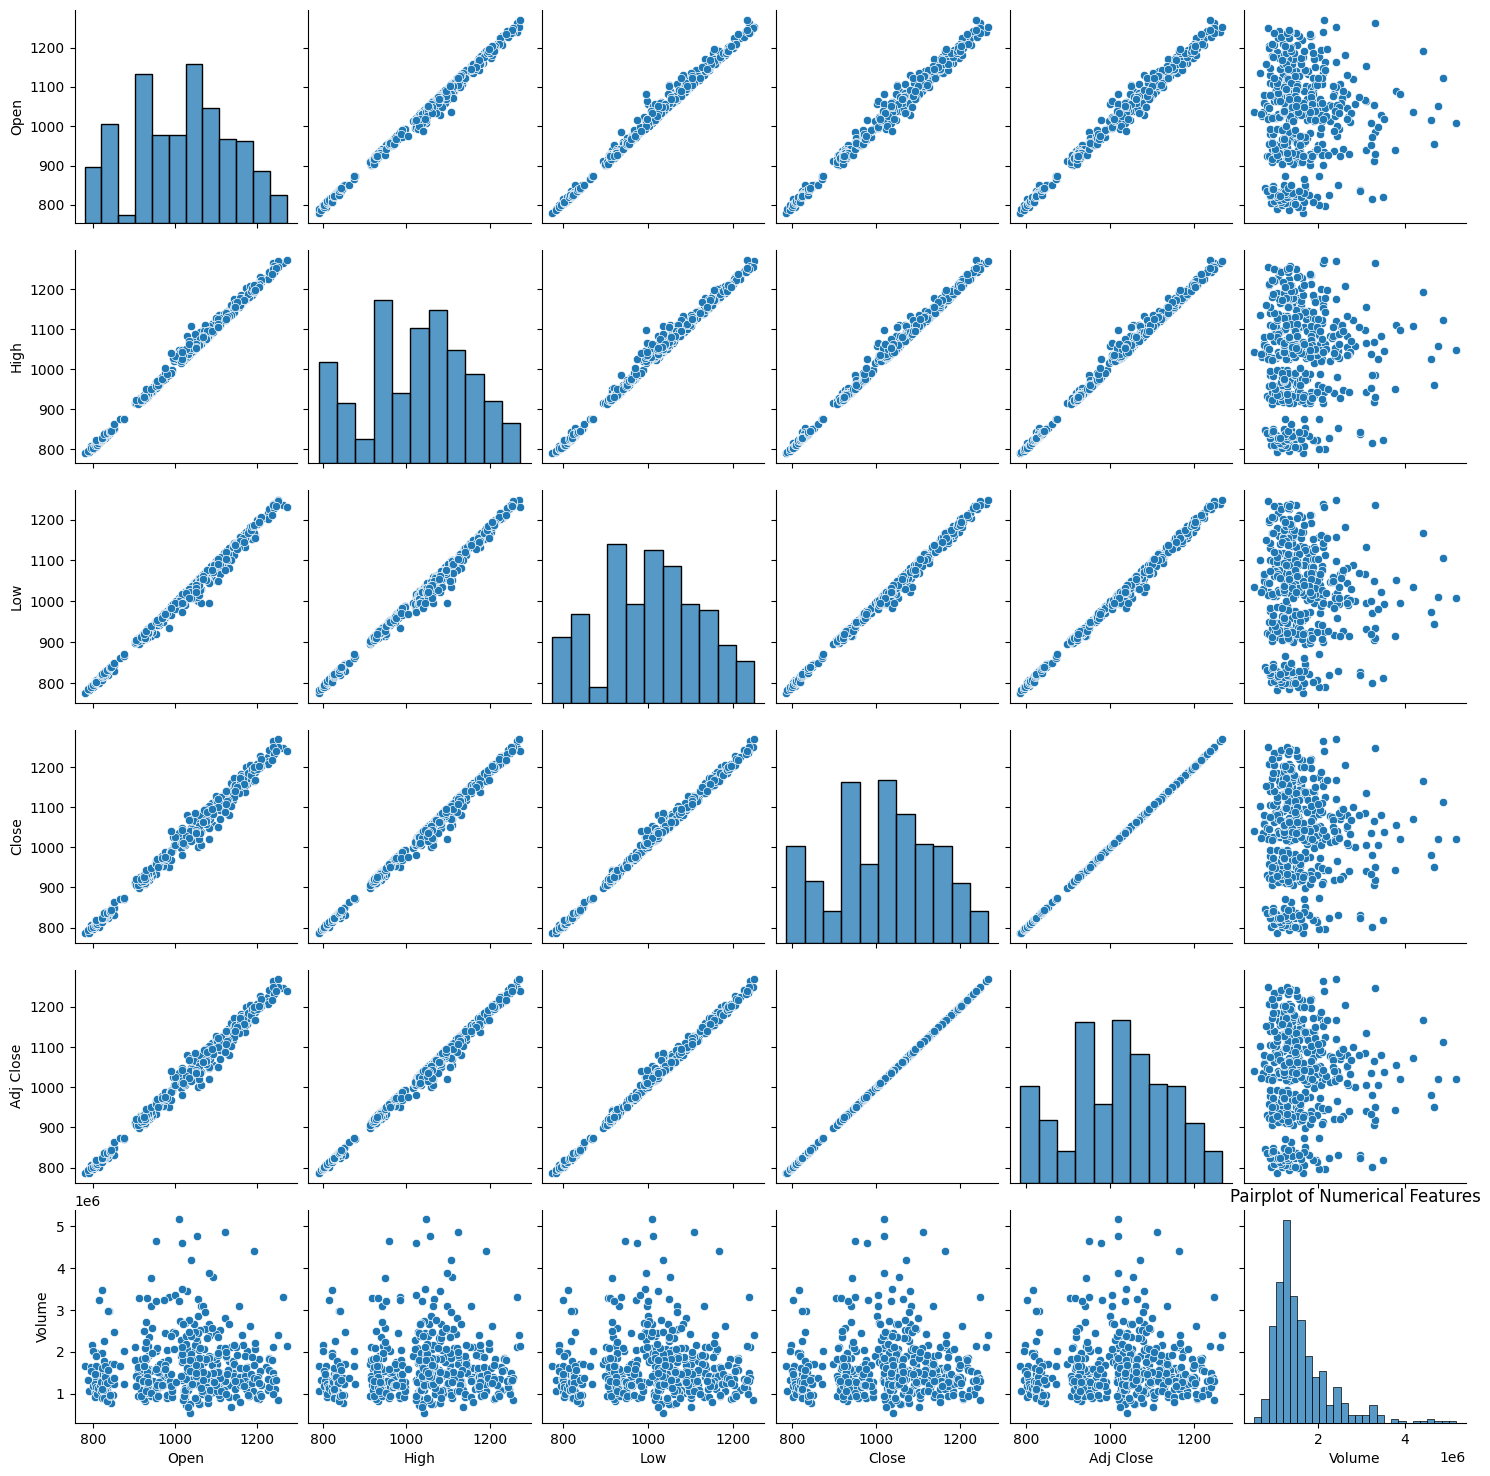

In [6]:
sns.pairplot(stock_data)
plt.title('Pairplot of Numerical Features')
plt.show()


### Correlation Heatmap

**Explanation:**

The correlation heatmap is a powerful visualization that provides insights into the relationships between numerical features. Key points include:

- **Visualizing Correlation Coefficients:**
  - The heatmap represents the correlation coefficients between numerical features in a color-coded format.
  - Values range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

- **Strength and Direction of Correlation:**
  - The numerical values in the heatmap indicate both the strength and direction of the correlation between pairs of features.
  - Positive values suggest a positive correlation, meaning that as one feature increases, the other tends to increase as well. Negative values indicate a negative correlation, where one feature tends to decrease as the other increases.

- **Identifying Strongly Correlated Features:**
  - Use the heatmap to quickly identify which features are strongly correlated. Strong correlations may indicate that changes in one feature are associated with changes in another.
  - Identifying correlations is crucial for understanding potential multicollinearity or dependencies between features in a dataset.

In summary, the correlation heatmap is a valuable tool for assessing the relationships between numerical features and gaining insights into how they may influence each other.


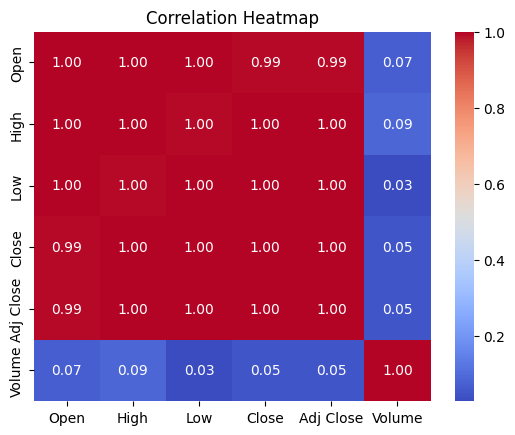

In [7]:
correlation_matrix = stock_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Time Series Plot of Closing Prices

**Explanation:**

The time series plot is a powerful visualization for understanding the historical performance of Google stock by depicting changes in closing prices over time. Key insights include:

- **Visualizing Changes Over Time:**
  - The plot provides a chronological representation of how the closing prices of Google stock have changed over the specified time period.
  - Each point on the plot corresponds to a specific date, allowing for a direct observation of trends and fluctuations.

- **Axes Representation:**
  - The x-axis represents dates, providing a temporal context for the closing prices.
  - The y-axis represents closing prices, indicating the financial value of Google stock at each corresponding date.

- **Observing Trends and Seasonality:**
  - Analyze the plot to identify trends or recurring patterns in the closing prices. Trends may reveal the general direction in which stock prices are moving.
  - Seasonal patterns or cyclic behaviors may become apparent, providing additional insights into potential market dynamics.

- **Detecting Anomalies:**
  - Look for anomalies or abrupt changes in the plot that might be indicative of significant events affecting stock prices.
  - Anomalies could include sudden spikes or dips that may warrant further investigation.

In summary, the time series plot is a valuable tool for uncovering patterns, trends, and anomalies in the historical performance of Google stock, providing insights that can be crucial for informed decision-making.


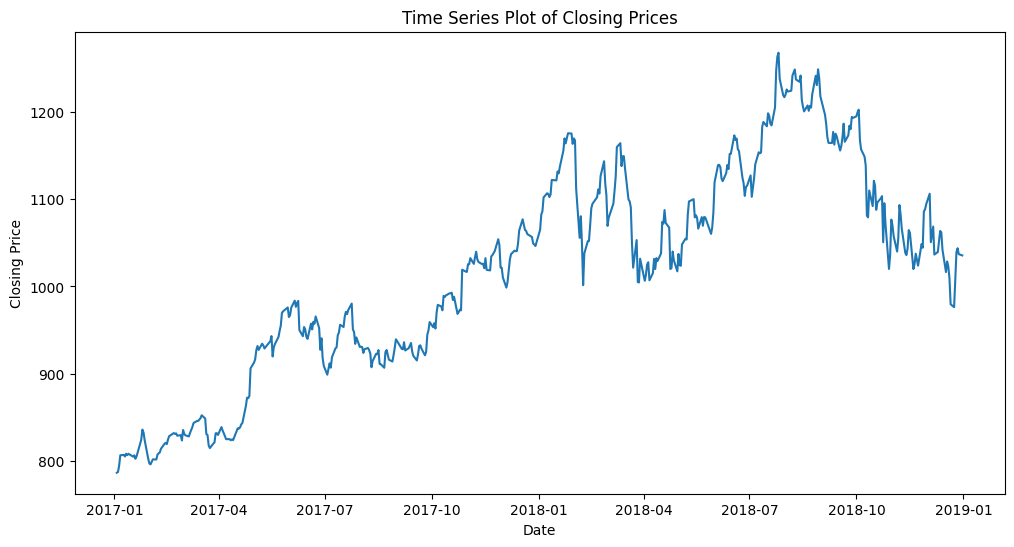

In [8]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=stock_data)
plt.title('Time Series Plot of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


## Seasonal Decomposition:

Seasonal decomposition is a statistical technique employed to dissect a time series into its core components, providing insights into the inherent patterns and structures within the data.

### Trend Component:

The trend component represents the long-term movement or direction of the data. Key characteristics include:

- Highlights the overall upward or downward trajectory over an extended period.
- Essential for understanding the underlying, sustained changes in the time series.

### Seasonal Component:

The seasonal component captures recurring and predictable patterns that repeat at regular intervals. Key features include:

- Patterns may occur daily, monthly, or seasonally, depending on the nature of the data.
- Identifying and understanding these repeating patterns is crucial for forecasting and trend analysis.

### Residual Component:

The residual component accounts for the remaining variability in the data after removing the trend and seasonal components. Key aspects include:

- Represents the random or irregular fluctuations in the time series.
- Analyzing the residual component allows for the detection of unusual occurrences or unexpected deviations from expected patterns.

In summary, seasonal decomposition provides a structured approach to break down time series data, enabling a deeper understanding of the trends, seasonality, and random variations inherent in the dataset.


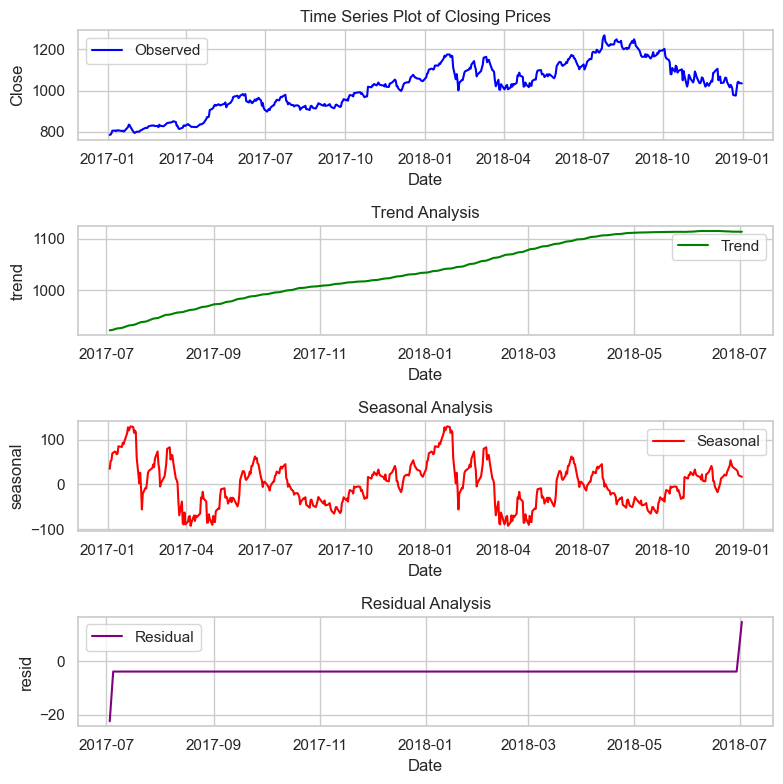

In [9]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# plot_stock_prices(stock_data)
plot_time_series_decomposition(stock_data, period=252)

# Enabling GPU

In [33]:
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [34]:
print("You are using - >",device)

You are using - > cuda


# Model Architecture

In [35]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        # GRU layer with specified input dimension, hidden dimension, number of layers, and dropout probability
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        
        # Fully connected layer to map the hidden dimension to the output dimension
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x, h):
        # Forward pass through the GRU layer
        out, h = self.gru(x, h)
        
        # Extract the output from the last time step and pass it through the fully connected layer
        out = self.fc(self.relu(out[:, -1]))
        
        return out, h

    def init_hidden(self, batch_size):
        # Initialize hidden state with zeros
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden


# Model Training and Evaluation

In [10]:
class StockDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.tensor(self.x_data[idx], dtype=torch.float32)
        y = torch.tensor(self.y_data[idx], dtype=torch.float32)
        return x, y

class GRUNet(pl.LightningModule):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x, h):
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:, -1]))
        return out, h

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(self.device)
        return hidden

class StockModel(pl.LightningModule):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, batch_size, learn_rate):
        super(StockModel, self).__init__()
        self.model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
        self.batch_size = batch_size
        self.learn_rate = learn_rate

    def forward(self, x, h):
        return self.model(x, h)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.learn_rate)

    def training_step(self, batch, batch_idx):
        x, label = batch
        h = self.model.init_hidden(self.batch_size)
        out, h = self.model(x.float(), h)
        loss = nn.MSELoss()(out, label.float())
        
        self.log("train_loss", loss, on_epoch=True, on_step=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, label = batch
        h = self.model.init_hidden(self.batch_size)
        out, h = self.model(x.float(), h)
        loss = nn.MSELoss()(out, label.float())
        self.log("val_loss", loss, on_epoch=True, on_step=True)
        return loss

    def train_dataloader(self):
        return DataLoader(train_dataset, batch_size=self.batch_size, shuffle=False,drop_last=True)
    
    def val_dataloader(self):
        return DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False,drop_last=True)

    def init_hidden(self, batch_size):
        return self.model.init_hidden(batch_size)
    
    def predict(self, dataloader):
        self.model.eval()
        predictions = []
        for x, _ in dataloader:
            h = self.model.init_hidden(x.shape[0])
            out, _ = self.model(x.float(), h)
            predictions.append(torch.tensor(out.detach().cpu().numpy()))
        predictions = torch.cat(predictions, dim=0)
        return predictions
    
    


batch_size = 1024
input_dim = x_train.shape[2]
output_dim = 1
n_layers = 2
hidden_dim = 256
learn_rate = 0.001

batch_size = 32
train_dataset = StockDataset(x_train, y_train)
test_dataset = StockDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False,drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,drop_last=True)

stock_model = StockModel(input_dim, hidden_dim, output_dim, n_layers, batch_size, learn_rate)

# Set up PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=100)
trainer.fit(stock_model, train_loader)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | GRUNet | 596 K 
---------------------------------
596 K     Trainable params
0         Non-trainable params
596 K     Total params
2.388     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.


In [11]:
trainer.validate(stock_model,test_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |                                                                                    | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      val_loss_epoch       │   0.0016563266981393099   │
└───────────────────────────┴───────────────────────────┘

[{'val_loss_epoch': 0.0016563266981393099}]

In [12]:
trainer.validate(stock_model,train_loader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |                                                                                    | 0/? [00:00<…

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      val_loss_epoch       │  0.00042819842929020524   │
└───────────────────────────┴───────────────────────────┘

[{'val_loss_epoch': 0.00042819842929020524}]

In [13]:
ypred = stock_model.predict(test_loader)

# Forecasting and Visualization

###  Training loss and Val Loss Visualization

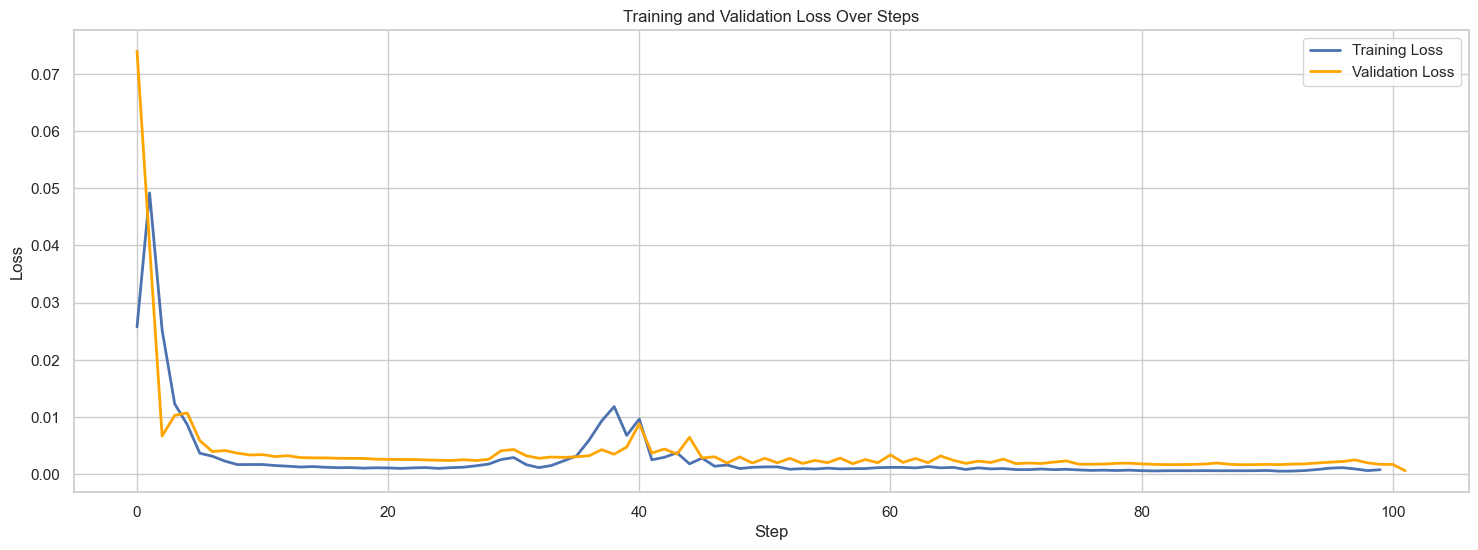

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

train_loss_df = pd.read_csv(r'.\train_loss.csv')
val_loss_df = pd.read_csv(r'.\val_loss.csv')
train_steps = range(len(train_loss_df))
val_steps = range(len(val_loss_df))

plt.figure(figsize=(18, 6))
plt.plot(train_steps, train_loss_df['Value'], label='Training Loss', linewidth=2)
plt.plot(val_steps, val_loss_df['Value'], label='Validation Loss', linewidth=2, color='orange')
plt.title('Training and Validation Loss Over Steps')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Forcasting Visualization

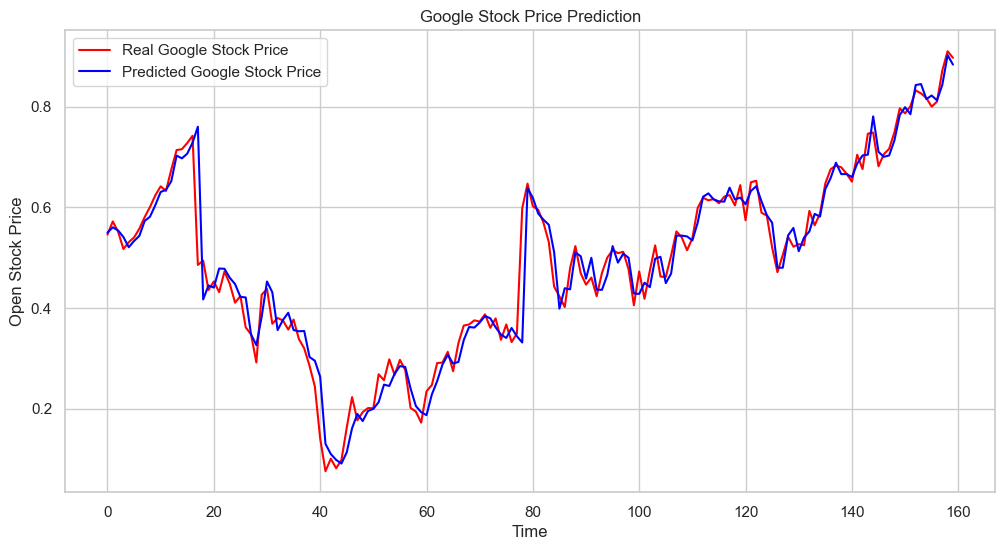

In [15]:
Stock.plot_prediction(y_test[0:160], ypred, 'Real Google Stock Price', 'Predicted Google Stock Price',title="Google Stock Price Prediction")